<a href="https://colab.research.google.com/github/padmajakunuku/infosys_springboard_internship/blob/main/milestone2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Step 1: Loading and Inspecting Data
import pandas as pd
df = pd.read_csv('/content/education_jobs_dataset_500_imputed.csv')
print(df.head())
print("Information",df.info())
print("Shape",df.shape)
print("Description",df.describe())
print("Null values")
print(df.isnull().sum())
print("Duplicates",df.duplicated().sum())


       Name        Education          Skill                    Certification  \
0  Person_1              BCA           HTML                Google IT Support   
1  Person_2  BSc Mathematics  Data Analysis                              NaN   
2  Person_3        BTech ECE            NaN   Embedded Systems Certification   
3  Person_4      BTech Civil        AutoCAD  Autodesk Certified Professional   
4  Person_5         BTech EE  Power Systems      Power Systems Certification   

               Job Role    Education_std Degree       Branch  
0    Software Developer              Bca    Bca          NaN  
1         Mathematician  BSc Mathematics    BSc  Mathematics  
2  Electronics Engineer        BTech Ece  BTech          Ece  
3   Structural Engineer      BTech Civil  BTech        Civil  
4   Electrical Engineer         BTech Ee  BTech           Ee  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column         Non-Null Count  D

In [8]:
#label encoding+scaling
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load dataset
df = pd.read_csv("education_jobs_dataset_500_imputed.csv")

# ---- Label Encoding ----
df_label = df.copy()
label_encoders = {}
for col in df_label.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col].astype(str))
    label_encoders[col] = le

# ---- Scaling numeric columns ----
scaler = StandardScaler()
numeric_cols = df_label.select_dtypes(include=['int64', 'float64']).columns
df_label[numeric_cols] = scaler.fit_transform(df_label[numeric_cols])

print("Label Encoded + Scaled Dataset:\n", df_label.head())



Label Encoded + Scaled Dataset:
        Name  Education     Skill  Certification  Job Role  Education_std  \
0 -1.728590  -1.655592 -0.871789      -0.090038  0.907175       1.622249   
1 -0.959558  -0.946255 -1.084524       1.151868  0.214675      -1.231311   
2 -0.190526   0.827087  1.787401      -0.400515 -0.477825       0.552164   
3  0.578506   0.472418 -1.509994      -1.331945  1.322675      -0.161226   
4  1.347538   1.181755 -0.127216       0.530915 -0.616325       0.908859   

     Degree    Branch  
0  2.164532  1.646589  
1 -1.095305  0.201579  
2  0.534613 -0.520926  
3  0.534613 -1.243431  
4  0.534613 -0.159674  


In [18]:
# one hot encoding
df_onehot_encoded = df.copy()

df_onehot_encoded = pd.get_dummies(df_onehot_encoded, drop_first=False)

print(df_onehot_encoded.head())

   Name_Person_1  Name_Person_10  Name_Person_100  Name_Person_101  \
0           True           False            False            False   
1          False           False            False            False   
2          False           False            False            False   
3          False           False            False            False   
4          False           False            False            False   

   Name_Person_102  Name_Person_103  Name_Person_104  Name_Person_105  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Name_Person_106  Name_Person_107  ...  Degree_Bca  Branch_Chemistry  \
0            False            False  ...        True             F

In [72]:
import pandas as pd

df_outlier = df_onehot_encoded.copy()

# Identify numeric columns with more than 2 unique values (skip 0/1 one-hot columns)
numeric_cols = [col for col in df_outlier.select_dtypes(include=['int64', 'float64']).columns
                if df_outlier[col].nunique() > 2]

if not numeric_cols:
    print("No numeric columns with potential outliers detected.")
else:
    for col in numeric_cols:
        Q1 = df_outlier[col].quantile(0.25)
        Q3 = df_outlier[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((df_outlier[col] < lower_bound) | (df_outlier[col] > upper_bound)).sum()
        print(f"{col}: {outliers} outliers detected")




No numeric columns with potential outliers detected.


In [73]:
for col in numeric_cols:
    Q1 = df_outlier[col].quantile(0.25)
    Q3 = df_outlier[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_outlier = df_outlier[(df_outlier[col] >= lower_bound) & (df_outlier[col] <= upper_bound)]

print("After removing outliers:", df_outlier.shape)


After removing outliers: (500, 609)


In [22]:
#Feature Selection
X = df_onehot_encoded.drop(df_onehot_encoded.filter(like='Job Role_').columns, axis=1)
y = df_onehot_encoded.filter(like='Job Role_')

In [20]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Save the one-hot encoded dataset to a new CSV file in the current directory
output_csv_path = 'education_jobs_onehot_01.csv'
df_onehot_01.to_csv(output_csv_path, index=False)

print(f"The one-hot encoded dataset has been saved to {output_csv_path}")

The one-hot encoded dataset has been saved to education_jobs_onehot_01.csv


In [23]:
# one hot encoding with 0/1 values
df_onehot_01 = df.copy()

df_onehot_01 = pd.get_dummies(df_onehot_01, drop_first=False).astype(int)

print(df_onehot_01.head())

   Name_Person_1  Name_Person_10  Name_Person_100  Name_Person_101  \
0              1               0                0                0   
1              0               0                0                0   
2              0               0                0                0   
3              0               0                0                0   
4              0               0                0                0   

   Name_Person_102  Name_Person_103  Name_Person_104  Name_Person_105  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   Name_Person_106  Name_Person_107  ...  Degree_Bca  Branch_Chemistry  \
0                0                0  ...           1              

Distribution of Job Roles:
Job Role
Data Analyst              53
Statistician              31
Electrical Engineer       27
Research Scientist        26
Electronics Engineer      25
Lab Analyst               22
Lab Assistant             21
Mathematician             21
Control Engineer          20
Structural Engineer       20
Software Engineer         20
Mechanical Engineer       19
System Analyst            17
VLSI Engineer             16
Embedded Engineer         16
Manufacturing Engineer    15
Data Scientist            15
Power Engineer            14
Business Analyst          13
Chemist                   13
Software Developer        13
Civil Engineer            13
Backend Developer         12
Design Engineer           12
Site Engineer             11
Web Developer              8
Name: count, dtype: int64


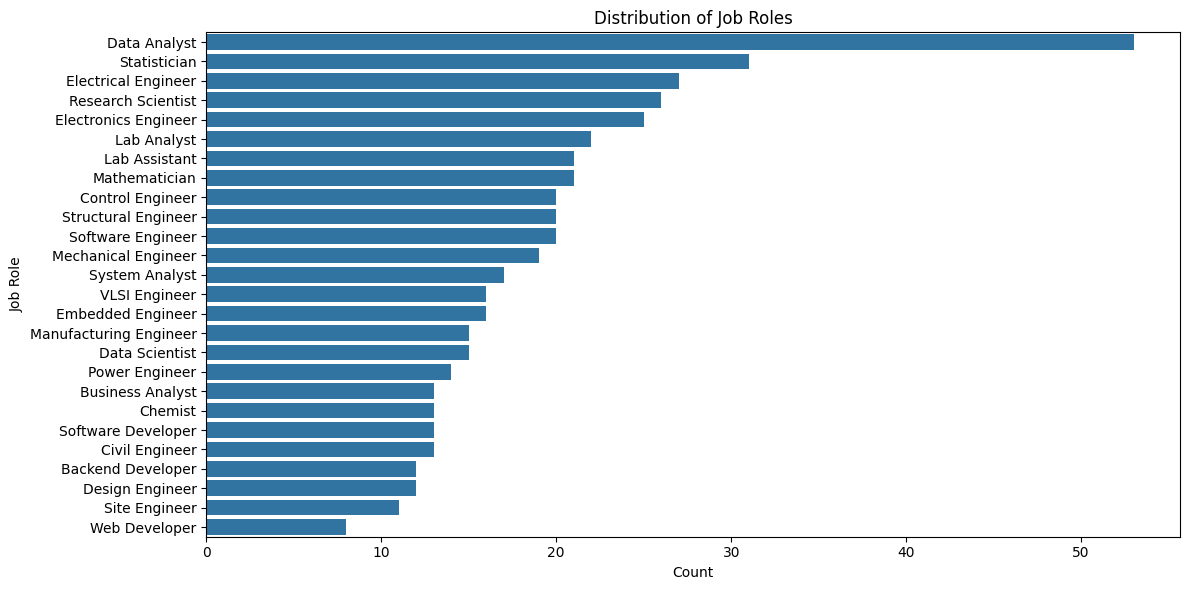

In [31]:
# Examine the distribution of the target variable ('Job Role')
print("Distribution of Job Roles:")
print(df['Job Role'].value_counts())

# You can also visualize the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Job Role', order = df['Job Role'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.xlabel('Count')
plt.ylabel('Job Role')
plt.tight_layout()
plt.show()

In [21]:
print(df_onehot_encoded.columns)

Index(['Name_Person_1', 'Name_Person_10', 'Name_Person_100', 'Name_Person_101',
       'Name_Person_102', 'Name_Person_103', 'Name_Person_104',
       'Name_Person_105', 'Name_Person_106', 'Name_Person_107',
       ...
       'Degree_Bca', 'Branch_Chemistry', 'Branch_Civil', 'Branch_Cse',
       'Branch_Ece', 'Branch_Ee', 'Branch_Mathematics', 'Branch_Mechanical',
       'Branch_Physics', 'Branch_Statistics'],
      dtype='object', length=609)


In [25]:
# Save the label encoded dataset to a new CSV file
output_csv_path = 'education_jobs_label_encoded.csv' # You can change the file name and path here
df_label.to_csv(output_csv_path, index=False)

print(f"The label encoded dataset has been saved to {output_csv_path}")

The label encoded dataset has been saved to education_jobs_label_encoded.csv


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (400, 583)
Shape of X_test: (100, 583)
Shape of y_train: (400, 26)
Shape of y_test: (100, 26)


/tmp/ipython-input-4289660968.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


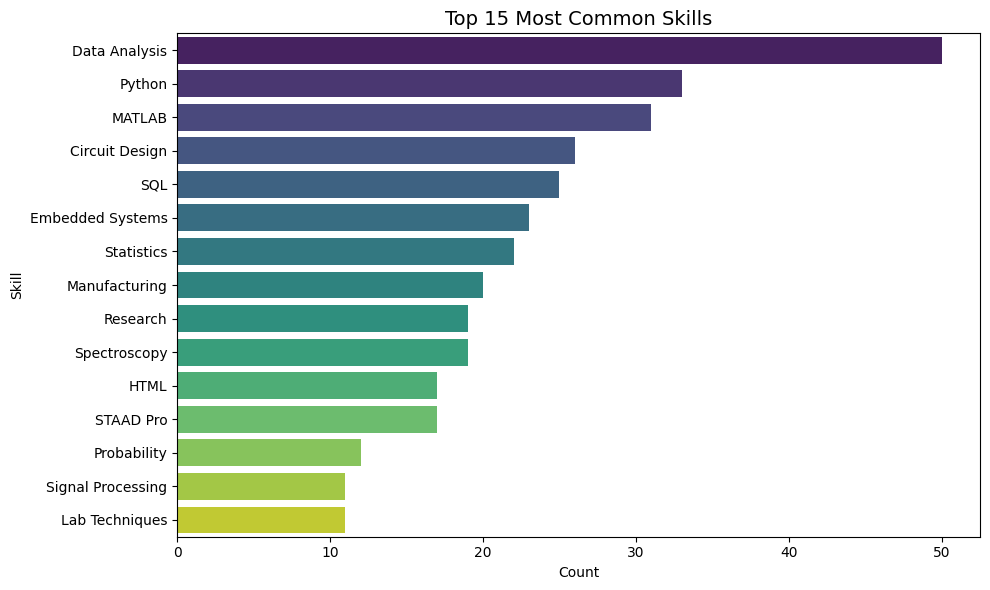

In [55]:
plt.figure(figsize=(10, 6))  # Increase figure size for clarity
top_skills = df['Skill'].value_counts().head(15)  # Show only top 15 skills

sns.barplot(
    x=top_skills.values,
    y=top_skills.index,
    palette="viridis"
)

plt.title("Top 15 Most Common Skills", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()



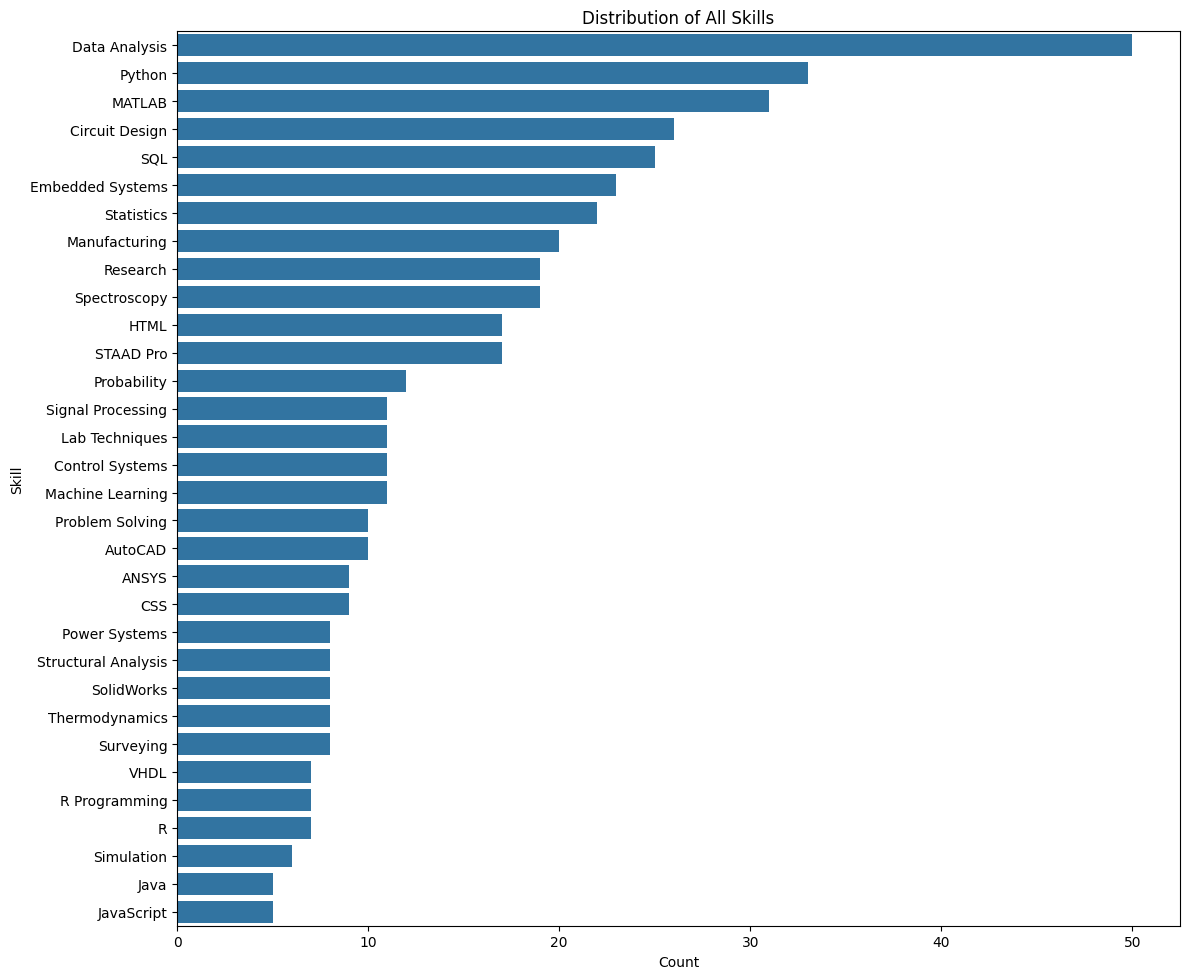

In [56]:
plt.figure(figsize=(12, max(6, len(df['Skill'].unique()) * 0.3)))
sns.countplot(data=df, y='Skill', order=df['Skill'].value_counts().index)
plt.title("Distribution of All Skills")
plt.xlabel("Count")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()


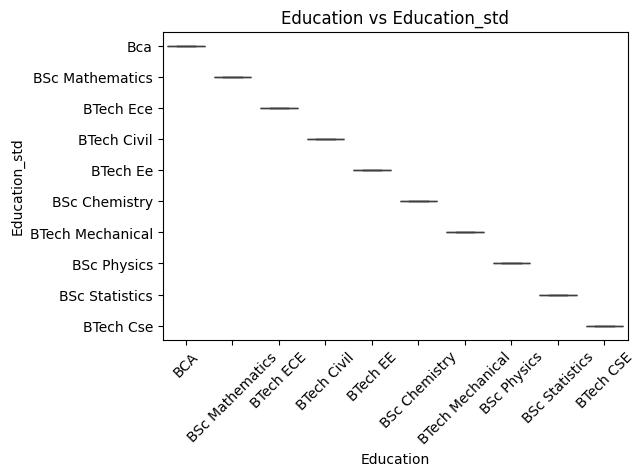

In [51]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Education', y='Education_std')
plt.title("Education vs Education_std")
plt.xticks(rotation=45)
plt.show()


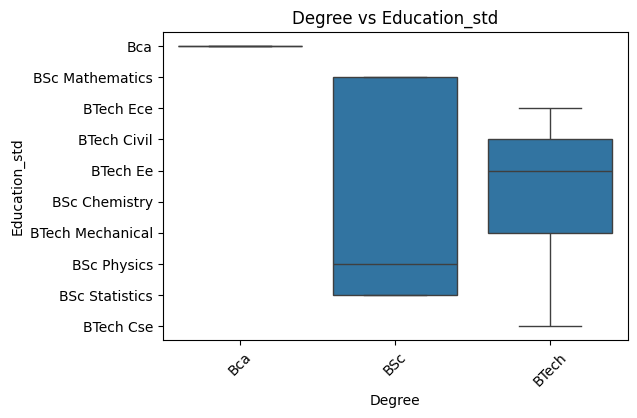

In [52]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Degree', y='Education_std')
plt.title("Degree vs Education_std")
plt.xticks(rotation=45)
plt.show()


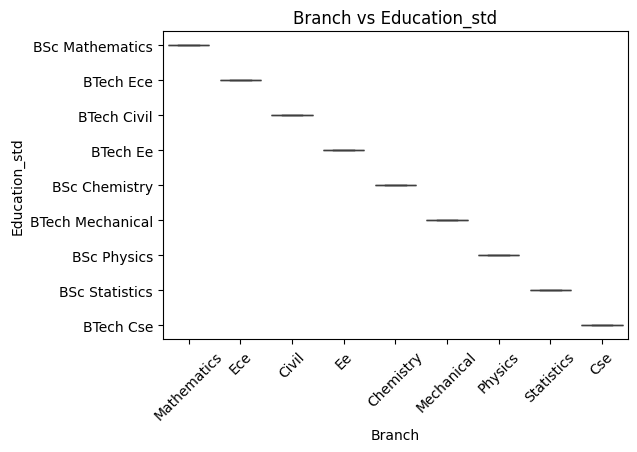

In [53]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Branch', y='Education_std')
plt.title("Branch vs Education_std")
plt.xticks(rotation=45)
plt.show()
